In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file_path = "/home/zmey1/VSCODE_FILES/OceanObservation/woa23_all_o00mn5d.csv"
annual_dataset = pd.read_csv(file_path, skiprows=1)

In [5]:
depth = annual_dataset.columns[2:]
column_names = ["Latitude", "Longitude"] + list(depth)
annual_dataset.columns = column_names

In [8]:
reshaped_data = pd.melt(
    annual_dataset,
    id_vars=["Latitude", "Longitude"],
    var_name="Depth",
    value_name="Oxygen_Value"
)

reshaped_data["Latitude"] = pd.to_numeric(reshaped_data["Latitude"], errors="coerce")
reshaped_data["Longitude"] = pd.to_numeric(reshaped_data["Longitude"], errors="coerce")
reshaped_data["Depth"] = pd.to_numeric(reshaped_data["Depth"], errors="coerce")
reshaped_data["Oxygen_Value"] = pd.to_numeric(reshaped_data["Oxygen_Value"], errors="coerce")

annual_reshaped_data_cleaned = reshaped_data.dropna()

annual_reshaped_data_cleaned.to_csv("cleaned_annual_dataset.csv", index=False)

print(annual_reshaped_data_cleaned.head())

      Latitude  Longitude  Depth  Oxygen_Value
1774     -77.5     -177.5    5.0       345.008
1775     -77.5     -172.5    5.0       368.465
1776     -77.5     -167.5    5.0       360.601
1777     -77.5     -162.5    5.0       359.496
1778     -77.5     -157.5    5.0       363.794


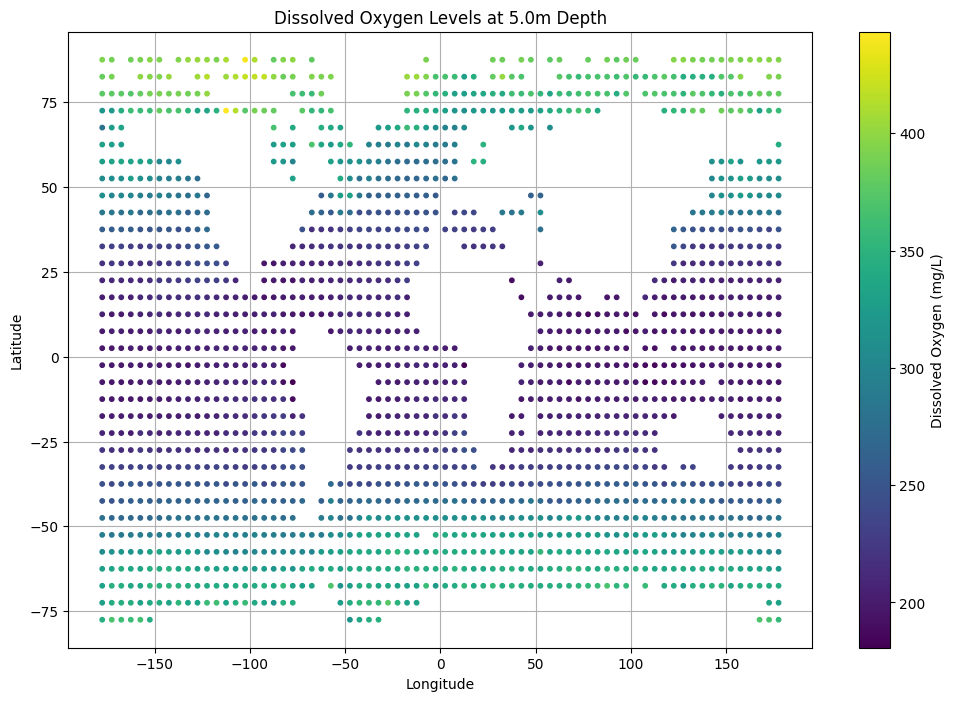

In [ ]:
# Filter the data for a specific depth, e.g., 5 meters

depth_of_interest = 5.0

filtered_data = annual_reshaped_data_cleaned[annual_reshaped_data_cleaned["Depth"] == depth_of_interest]



# Plot a scatterplot of oxygen levels across latitude and longitude

plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    filtered_data["Longitude"],
    filtered_data["Latitude"],
    c=filtered_data["Oxygen_Value"],
    cmap="viridis",
    s=10
)

plt.colorbar(scatter, label="Dissolved Oxygen (mg/L)")

plt.title(f"Dissolved Oxygen Levels at {depth_of_interest}m Depth")

plt.xlabel("Longitude")

plt.ylabel("Latitude")

plt.grid(True)

plt.show()

Here we can see oxygen varies significantly with longitude and latitude thus highlightng regional patterns
 

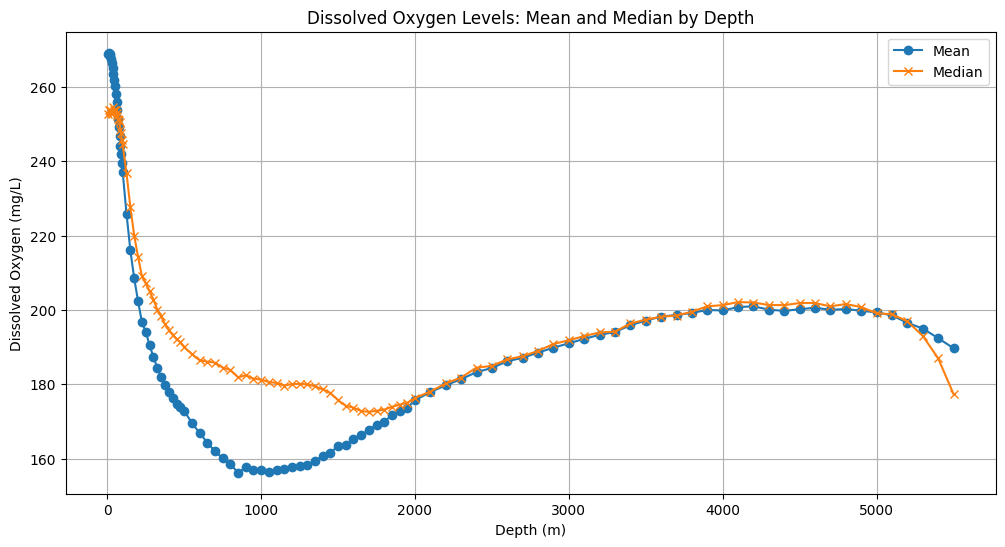

In [14]:
# Group by depth and calculate mean, median, and variance of dissolved oxygen
depth_stats = annual_reshaped_data_cleaned.groupby("Depth")["Oxygen_Value"].agg(["mean", "median", "var"])

# Step 3: Ensure Clean Data
# Drop any rows with NaN or non-numeric values in the statistical calculations
depth_stats_cleaned = depth_stats.dropna()

# Step 4: Plot Mean and Median Oxygen Levels by Depth
plt.figure(figsize=(12, 6))

# Plot mean values
plt.plot(
    depth_stats_cleaned.index,
    depth_stats_cleaned["mean"],
    label="Mean",
    marker="o"
)

# Plot median values
plt.plot(
    depth_stats_cleaned.index,
    depth_stats_cleaned["median"],
    label="Median",
    marker="x"
)

# Add labels, title, legend, and grid
plt.title("Dissolved Oxygen Levels: Mean and Median by Depth")
plt.xlabel("Depth (m)")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


Decrease in oxygen level till 1000m then increases to a stable level due to depth stability of oxygen